In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/mustafa/miniconda3/envs/t2/lib/python3.13/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [2]:
from cycler import cycler

plt.rcParams.update({

    # ==== FIGURE ====
    "figure.figsize": (9, 5.5),
    "figure.dpi": 120,
    "figure.facecolor": "white",
    "figure.titlesize": 16,          # match axes title
    "figure.titleweight": "bold",    # match axes title
    "figure.autolayout": True,

    # ==== FONT & TEXT ====
    "font.family": ["Roboto", "DejaVu Sans"],
    "text.color": "#2C2C2C",

    # ==== AXES ====
    "axes.facecolor": "#FAFAFA",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "axes.titlepad": 12,
    "axes.titlecolor": "#444444",
    "axes.labelsize": 14,
    "axes.labelcolor": "#2C2C2C",
    "axes.edgecolor": "#555555",
    "axes.linewidth": 0.8,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.grid": True,
    "axes.prop_cycle": cycler(color=[
        "#4E79A7", "#F28E2B", "#59A14F", "#E15759", "#B07AA1",
        "#9C755F", "#FF9DA7", "#8C8C8C", "#EDC948", "#76B7B2"
    ]),

    # ==== GRID ====
    "grid.alpha": 0.25,
    "grid.color": "#BBBBBB",
    "grid.linestyle": "--",

    # ==== TICKS ====
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.color": "#333333",
    "ytick.color": "#333333",
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,

    # ==== LEGEND ====
    "legend.fontsize": 12,
    "legend.frameon": True,
    "legend.framealpha": 0.85,
    "legend.facecolor": "white",
    "legend.edgecolor": "#DDDDDD",
    "legend.fancybox": True,
    "legend.shadow": False,

    # ==== LINES ====
    "lines.linewidth": 2.2,
    "lines.markersize": 6,
    "lines.markeredgewidth": 0.8
})

# The Data

In [3]:
data = pd.read_csv('heart.csv')
features = data.drop(['HeartDisease'], axis=1)
target = data['HeartDisease']

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Features
1. Age: age of the patient [years]

2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]

In [4]:
print(f'Features matrix has {data.shape[0]} rows and {features.shape[1]} columns')
print(f'Target feature has {target.shape[0]} rows')

Features matrix has 918 rows and 11 columns
Target feature has 918 rows


In [5]:
print(f'Features names:\n\n{features.columns}')

Features names:

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


In [6]:
print(f'Target classes:\n\n{target.value_counts()}')

Target classes:

HeartDisease
1    508
0    410
Name: count, dtype: int64


In [7]:
is_any_null = any(data.isnull().sum(axis=0))
print(f'Is there any null values in features? | {is_any_null}')

is_any_duplicate = any(data.duplicated())
print(f'Is there any duplicate values in training data? | {is_any_duplicate}')

Is there any null values in features? | False
Is there any duplicate values in training data? | False


In [8]:
features.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


<Axes: xlabel='HeartDisease', ylabel='count'>

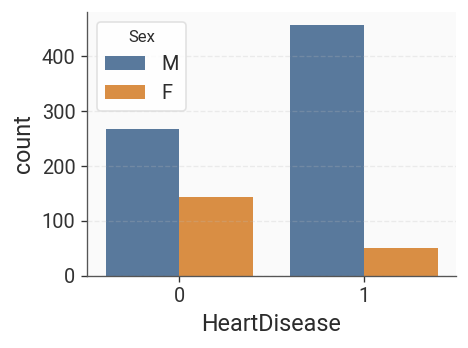

In [9]:
plt.figure(figsize=(4, 3))
sns.countplot(data=data, x='HeartDisease', hue='Sex')

# Numerical Features

In [10]:
numerical_features = features.select_dtypes(include=np.number)
numerical_features.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


Age             49.0
RestingBP      200.0
Cholesterol    603.0
FastingBS        1.0
MaxHR          142.0
Oldpeak          8.8
dtype: float64


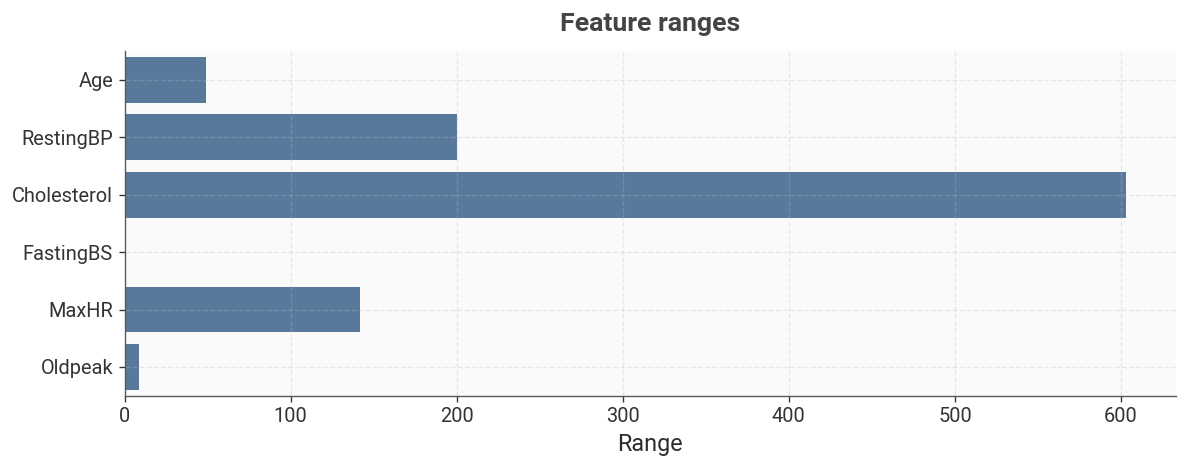

In [11]:
def calculate_ranges(column : np.ndarray):
    return column.max() - column.min()

feature_ranges = numerical_features.aggregate(calculate_ranges)

plt.figure(figsize=(10, 4))

sns.barplot(x=feature_ranges, y=feature_ranges.index)    # feature range for the first 10

plt.title('Feature ranges')
plt.xlabel('Range')
plt.ylabel('')
plt.grid(alpha=0.3)

print(feature_ranges)

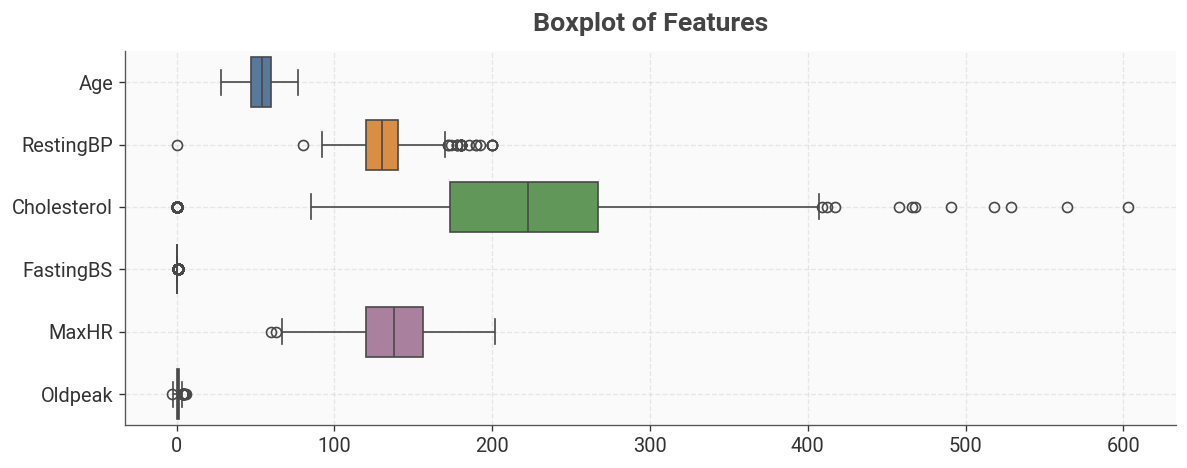

In [12]:
plt.figure(figsize=(10, 4))

sns.boxplot(data=numerical_features, orient='h')

plt.title('Boxplot of Features')
plt.grid(alpha=0.3)

# Correlation

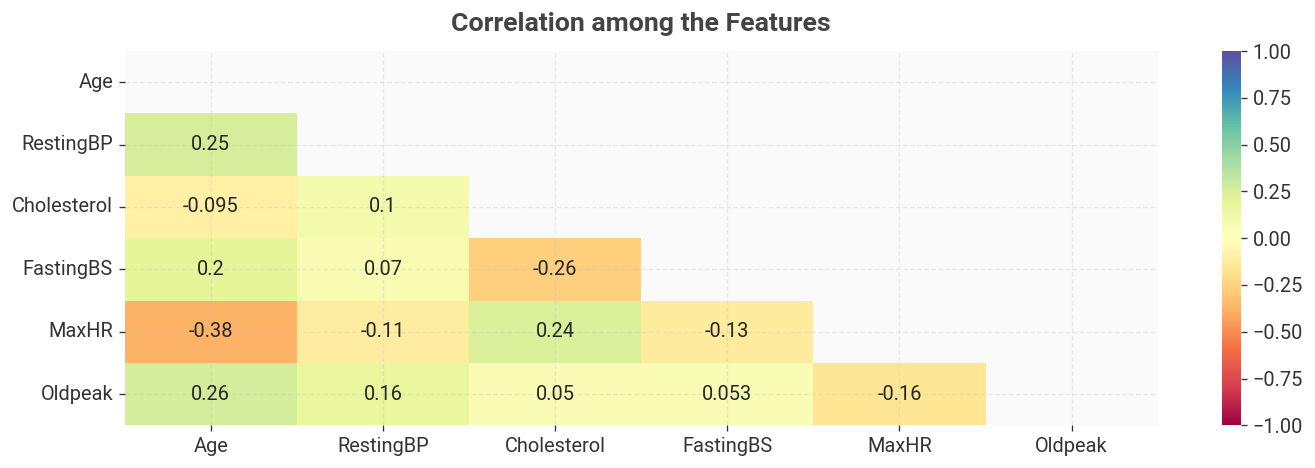

In [13]:
plt.figure(figsize=(12, 4))

correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, mask=np.triu(correlation_matrix), annot=True, cmap='Spectral', cbar=True,
            vmin=-1, vmax=1, center=0.0, annot_kws={"size": 12})
plt.title('Correlation among the Features');

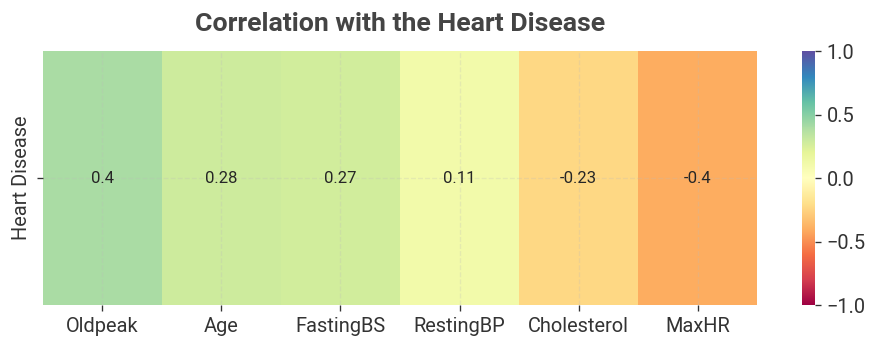

In [14]:
plt.figure(figsize=(8, 3))

features_target_correlation_matrix = numerical_features.corrwith(target).to_frame('Heart Disease')
features_target_correlation_matrix = features_target_correlation_matrix.sort_values(by='Heart Disease', ascending=False)

sns.heatmap(features_target_correlation_matrix.T, annot=True, cmap='Spectral', vmin=-1, vmax=1, center=0)

plt.title('Correlation with the Heart Disease')
plt.tight_layout()

# Categorical Features

In [15]:
catogerical_features = features.select_dtypes(exclude=np.number)
catogerical_features.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [16]:
print(catogerical_features['Sex'].unique())
print(catogerical_features['ChestPainType'].unique())
print(catogerical_features['RestingECG'].unique())
print(catogerical_features['ExerciseAngina'].unique())
print(catogerical_features['ST_Slope'].unique())

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


# Preprocessing

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Just to make sure we didn't miss a feature
print(len(numerical_features.columns) + len(catogerical_features.columns) == len(features.columns))

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numerical_features.columns),
        ('encoder', OneHotEncoder(sparse_output=False), catogerical_features.columns),
    ],
)

True


# Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, shuffle=True, random_state=42, stratify=target)

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression()),
])


pipe.fit(X_train, y_train)

predictions = pipe.predict(X_test)

## How categorical features were transformed

In [20]:
preprocessor = pipe['preprocessor']

transformed_features = preprocessor.transform(X_train)

transformed_df = pd.DataFrame(transformed_features, columns=preprocessor.get_feature_names_out())

# Categorical feature names start with "encoder"
# transformed_categorical_feature_names = [column for column in transformed_df.columns if column.startswith('encoder')]
transformed_categorical_feature_names = filter(lambda name: name.startswith('encoder'),  transformed_df.columns.tolist() )
transformed_df[transformed_categorical_feature_names].head(5)

,encoder__Sex_F,encoder__Sex_M,encoder__ChestPainType_ASY,encoder__ChestPainType_ATA,encoder__ChestPainType_NAP,encoder__ChestPainType_TA,encoder__RestingECG_LVH,encoder__RestingECG_Normal,encoder__RestingECG_ST,encoder__ExerciseAngina_N,encoder__ExerciseAngina_Y,encoder__ST_Slope_Down,encoder__ST_Slope_Flat,encoder__ST_Slope_Up
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Coefficients

In [21]:
numerical_column_names = preprocessor.named_transformers_['scaler'].get_feature_names_out()
categorical_column_names = preprocessor.named_transformers_['encoder'].get_feature_names_out()
all_features = np.concatenate([numerical_column_names, categorical_column_names])


# Extract numeric scaler info
scaler = preprocessor['scaler']
means = scaler.mean_
scales = scaler.scale_


# Get model coefficients
model_coefs = pipe['model'].coef_[0]  # assuming binary classification


# Separate numeric and categorical
num_coefs_scaled = model_coefs[:len(numerical_column_names)]  # the first len(numerical_column_names) are the scaled numerical features
cat_coefs = model_coefs[len(numerical_column_names):]         # the rest of the features are the categorical features


# Unscale numeric coefficients
num_coefs_original = num_coefs_scaled / scales


# Unscale intercept
intercept_scaled = pipe['model'].intercept_[0]
intercept_original = intercept_scaled - np.sum((means / scales) * num_coefs_scaled)


# Combine all coefficients
all_coefs = np.concatenate([num_coefs_original, cat_coefs])
coefficients_df = pd.DataFrame(all_coefs, index=all_features, columns=['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False).round(2)


# Transform the unscaled coefficients (log odds) into multiplicative factors of the odds.
coefficients_df['Odds Ratio'] = np.exp(coefficients_df['Coefficient']).round(2)


# Transform the multiplicative factors of the odds, into percentages (most interpretable)
coefficients_df['Percent Change'] = ( (coefficients_df['Odds Ratio'] - 1) * 100 ).round(0)

coefficients_df['Probability'] = (coefficients_df['Odds Ratio'] / (1 + coefficients_df['Odds Ratio'])).round(2)

print("Adjusted intercept:", intercept_original)
coefficients_df


Adjusted intercept: 0.6371141980465124


,Coefficient,Odds Ratio,Percent Change,Probability
ChestPainType_ASY,1.29,3.63,263.0,0.78
FastingBS,1.10,3.00,200.0,0.75
ST_Slope_Flat,1.03,2.80,180.0,0.74
Sex_M,0.50,1.65,65.0,0.62
ExerciseAngina_Y,0.38,1.46,46.0,0.59
Oldpeak,0.26,1.30,30.0,0.57
RestingECG_LVH,0.22,1.25,25.0,0.56
ST_Slope_Down,0.14,1.15,15.0,0.53
Age,0.01,1.01,1.0,0.50
RestingBP,0.00,1.00,0.0,0.50


| Column         | What it is                        | How to interpret              |
| -------------- | --------------------------------- | ----------------------------- |
| Coefficient    | Log-odds change per unit increase | +1 → log-odds go up by 1      |
| Odds Ratio     | exp(coef)                         | Multiplicative change in odds |
| Percent Change | (exp(coef)-1)\*100                | % increase/decrease in odds   |


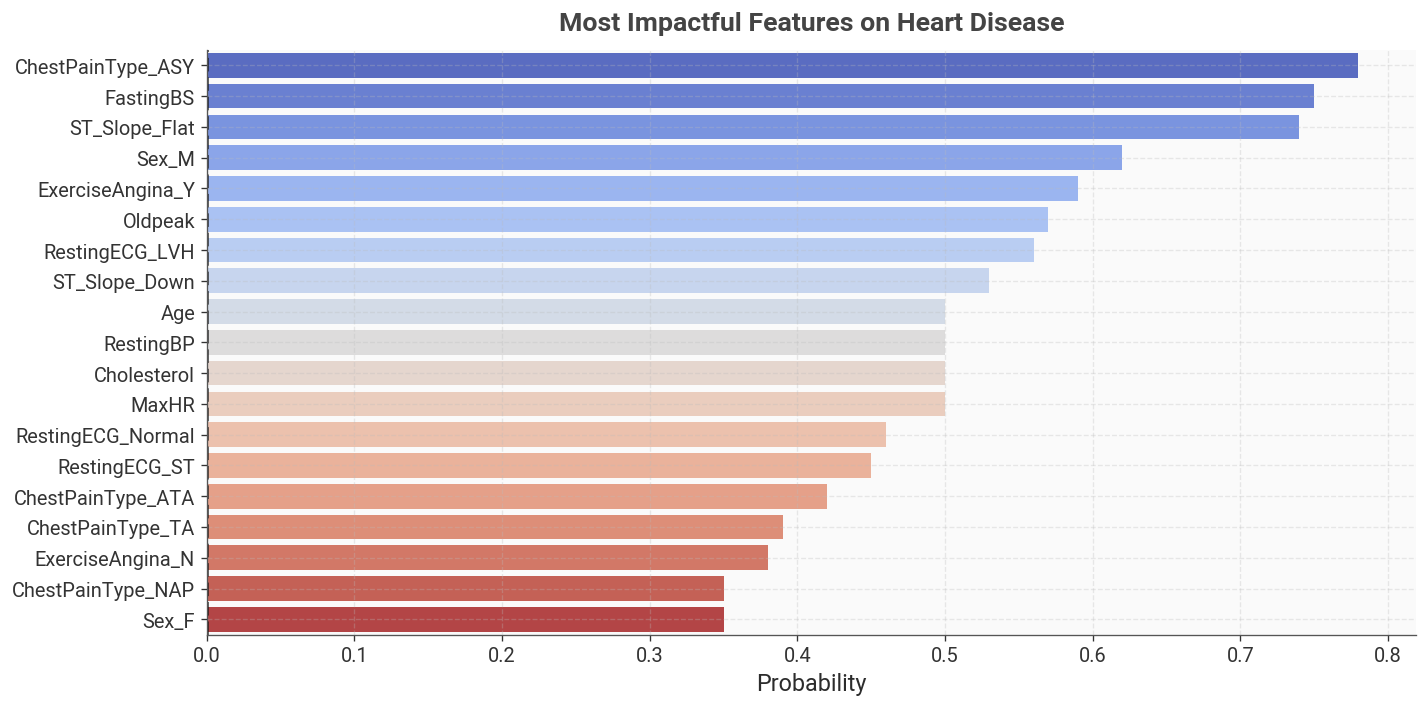

In [22]:
threshold = 0.3

significant_features = coefficients_df.loc[(coefficients_df['Probability'] > threshold) | (coefficients_df['Probability'] < -threshold)]

plt.figure(figsize=(12, 6))

sns.barplot(data=significant_features, y=significant_features.index, x='Probability',
            palette='coolwarm', hue=significant_features.index, legend=False)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.7)

plt.ylabel('')
plt.grid(alpha=0.3)
plt.title('Most Impactful Features on Heart Disease');

# Scoring

In [23]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,  f1_score

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


scores_df = pd.DataFrame(index=['Accuracy', 'Recall', 'Precision', 'F1'], data={'Score': [accuracy, recall, precision, f1]}).round(2)
scores_df.T

,Accuracy,Recall,Precision,F1
Score,0.88,0.92,0.87,0.9


## Checking overfit

In [24]:
training_predictions = pipe.predict(X_train)

training_accuracy = accuracy_score(y_train, training_predictions)
training_recall = recall_score(y_train, training_predictions)
training_precision = precision_score(y_train, training_predictions)
training_f1 = f1_score(y_train, training_predictions)

scores_df['Training Score'] = [training_accuracy, training_recall, training_precision, training_f1]
scores_df.T.round(2)

,Accuracy,Recall,Precision,F1
Score,0.88,0.92,0.87,0.90
Training Score,0.86,0.88,0.86,0.87


# Checking Model Stability

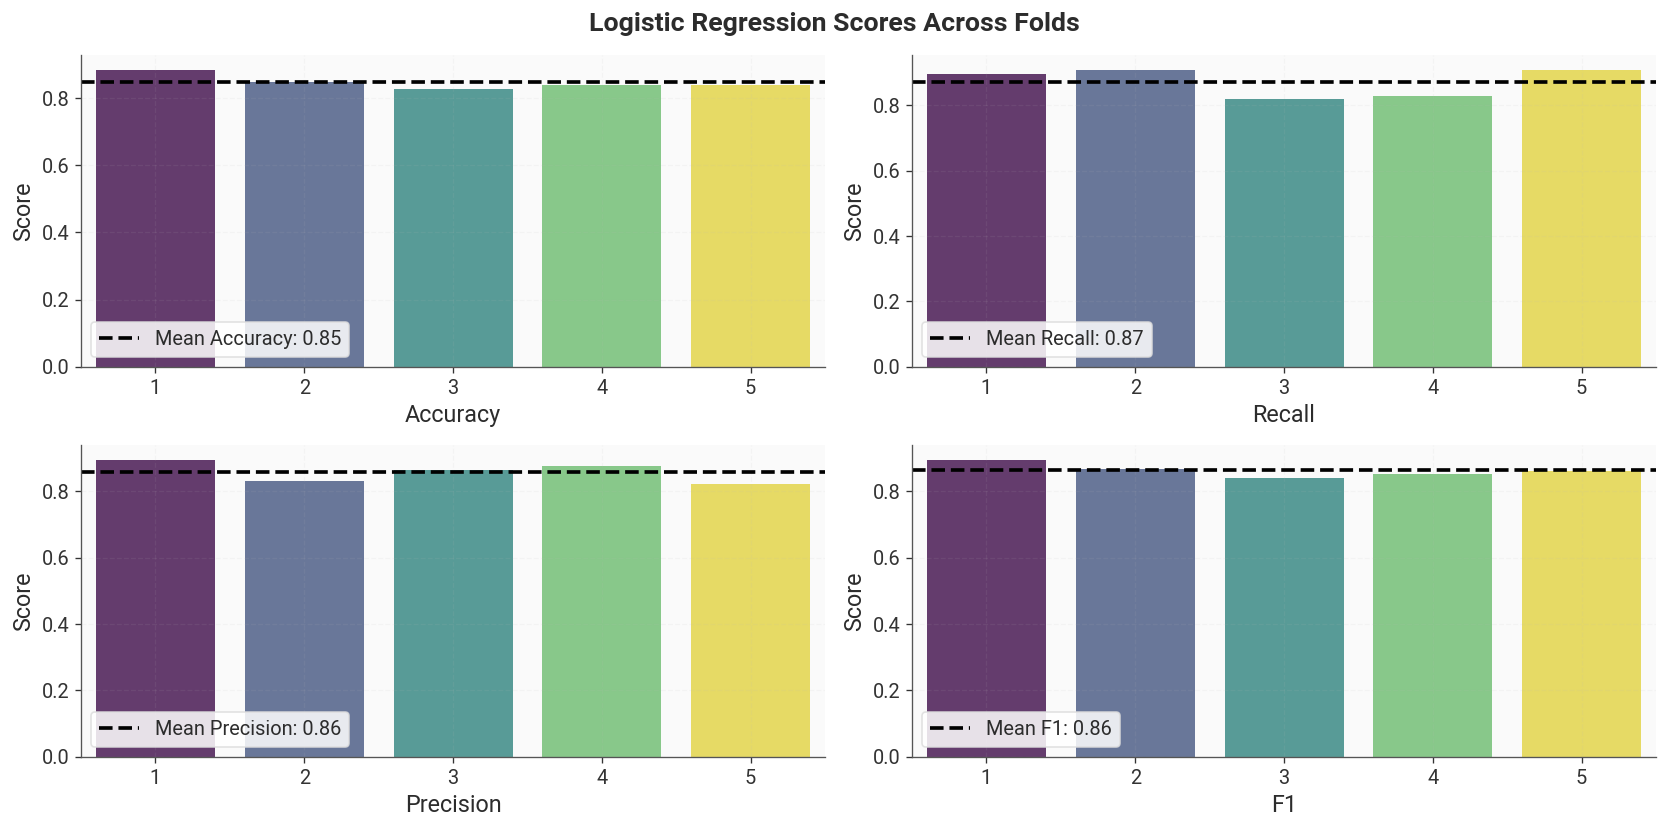

In [25]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

n_folds = 5
skfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

accuracies = cross_val_score(pipe, X_train, y_train, cv=skfold, scoring='accuracy')
recalls    = cross_val_score(pipe, X_train, y_train, cv=skfold, scoring='recall')
precisions = cross_val_score(pipe, X_train, y_train, cv=skfold, scoring='precision')
f1s        = cross_val_score(pipe, X_train, y_train, cv=skfold, scoring='f1')

figure, axes = plt.subplots(2, 2, figsize=(14, 7))
axes = axes.flatten()

for ax, (score_name, score_values) in zip(axes, zip(['Accuracy', 'Recall', 'Precision', 'F1'], [accuracies, recalls, precisions, f1s])):
    sns.barplot(x=range(1, n_folds+1), y=score_values, ax=ax,  palette='viridis', alpha=0.8, hue=range(1, n_folds+1), legend=False)
    
    mean_score = np.mean(score_values)
    ax.axhline(y=mean_score, color='black', linestyle='--', label=f'Mean {score_name}: {mean_score:.2f}')
    
    ax.set_xlabel(score_name)
    ax.set_ylabel('Score')
    ax.grid(alpha=0.1)
    ax.legend()

figure.suptitle('Logistic Regression Scores Across Folds')
figure.tight_layout()

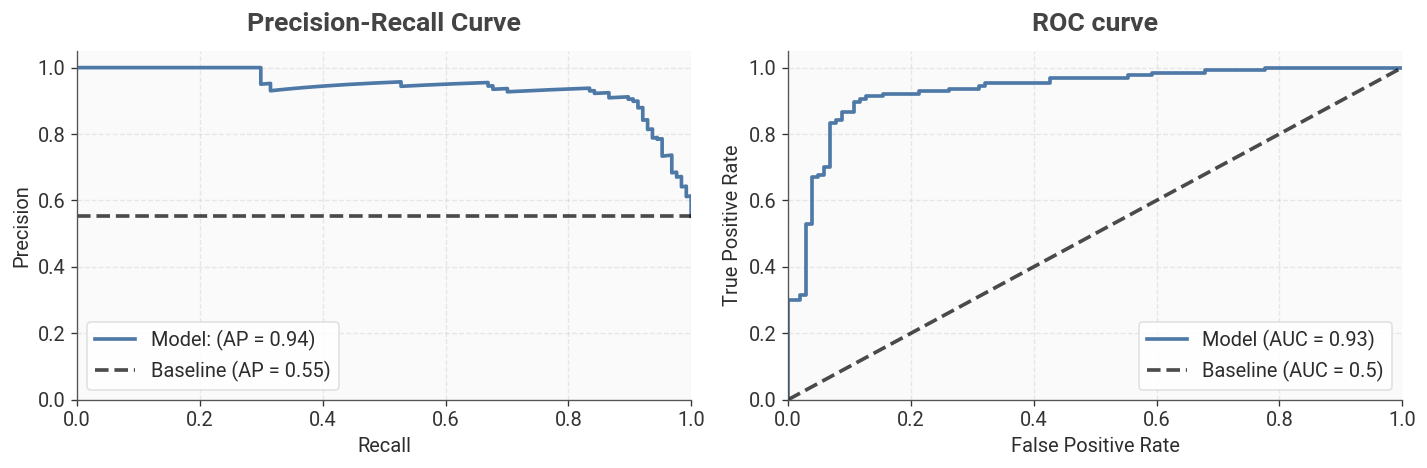

In [26]:
import sys
sys.path.append('../../')

from my_utils.classification_eval_plots import ClassificationEvaluationPlots

prediction_probabilities = pipe.predict_proba(X_test)

figure, axes = plt.subplots(1, 2, figsize=(12, 4))

ClassificationEvaluationPlots.plot_precision_recall_curve(y_test, prediction_probabilities[:, 1], ax=axes[0])
ClassificationEvaluationPlots.plot_roc_curve(y_test, prediction_probabilities[:, 1], ax=axes[1])

# Comparison with Other Models

In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

comparative_scores_df = pd.DataFrame(index=['Accuracy', 'Recall', 'Precision', 'F1'],
                                     data={'Logistic Regression': [np.mean(accuracies),
                                                                   np.mean(recalls), 
                                                                   np.mean(precisions),
                                                                   np.mean(f1s)]})

# ------------------------------------------------------------------------------------------------------

pipe_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVC(kernel='rbf')),
])

accuracies_svc = cross_val_score(pipe_svc, X_train, y_train, cv=skfold, scoring='accuracy') 
recalls_svc    = cross_val_score(pipe_svc, X_train, y_train, cv=skfold, scoring='recall')
precisions_svc = cross_val_score(pipe_svc, X_train, y_train, cv=skfold, scoring='precision')
f1s_svc        = cross_val_score(pipe_svc, X_train, y_train, cv=skfold, scoring='f1')

comparative_scores_df['SVC'] = [
    np.mean(accuracies_svc),
    np.mean(recalls_svc),
    np.mean(precisions_svc),
    np.mean(f1s_svc),
]

# ------------------------------------------------------------------------------------------------------

pipe_ada = Pipeline([
    ('preprocessor', preprocessor),
    ('model', AdaBoostClassifier()),
])

accuracies_ada = cross_val_score(pipe_ada, X_train, y_train, cv=skfold, scoring='accuracy')
recalls_ada    = cross_val_score(pipe_ada, X_train, y_train, cv=skfold, scoring='recall')
precisions_ada = cross_val_score(pipe_ada, X_train, y_train, cv=skfold, scoring='precision')
f1s_ada        = cross_val_score(pipe_ada, X_train, y_train, cv=skfold, scoring='f1')

comparative_scores_df['AdaBoost'] = [
    np.mean(accuracies_ada),
    np.mean(recalls_ada),
    np.mean(precisions_ada),
    np.mean(f1s_ada),
]

# ------------------------------------------------------------------------------------------------------

comparative_scores_df.round(2)

,Logistic Regression,SVC,AdaBoost
Accuracy,0.85,0.86,0.84
Recall,0.87,0.91,0.87
Precision,0.86,0.84,0.85
F1,0.86,0.88,0.86


In [28]:
from scipy.stats import ttest_rel

t_stat, p_val = ttest_rel(accuracies_svc, accuracies)
print(f"T-stat: {t_stat:.3f}, p-value: {p_val:.3f}")

if p_val < 0.05:
    print("Accuracy | SVC's difference is statistically significant.")
else:
    print("Accuracy | No significant difference — it's probably just noise.")

print('\n', '-' * 50, '\n')

t_stat, p_val = ttest_rel(recalls_svc,  recalls)
print(f"T-stat: {t_stat:.3f}, p-value: {p_val:.3f}")

if p_val < 0.05:
    print("Recall | SVC's difference is statistically significant.")
else:
    print("Recall | No significant difference — it's probably just noise.")

print('\n', '-' * 50, '\n')


t_stat, p_val = ttest_rel(precisions_svc,  precisions)
print(f"T-stat: {t_stat:.3f}, p-value: {p_val:.3f}")

if p_val < 0.05:
    print("Precision | SVC's difference is statistically significant.")

else:
    print("Precision | No significant difference — it's probably just noise.")

print('\n', '-' * 50, '\n')

t_stat, p_val = ttest_rel(f1s_svc,  f1s)
print(f"T-stat: {t_stat:.3f}, p-value: {p_val:.3f}")

if p_val < 0.05:
    print("F1 | SVC's difference is statistically significant.")
else:
    print("F1 | No significant difference — it's probably just noise.")

T-stat: 1.127, p-value: 0.323
Accuracy | No significant difference — it's probably just noise.

 -------------------------------------------------- 

T-stat: 9.459, p-value: 0.001
Recall | SVC's difference is statistically significant.

 -------------------------------------------------- 

T-stat: -1.244, p-value: 0.282
Precision | No significant difference — it's probably just noise.

 -------------------------------------------------- 

T-stat: 1.822, p-value: 0.143
F1 | No significant difference — it's probably just noise.


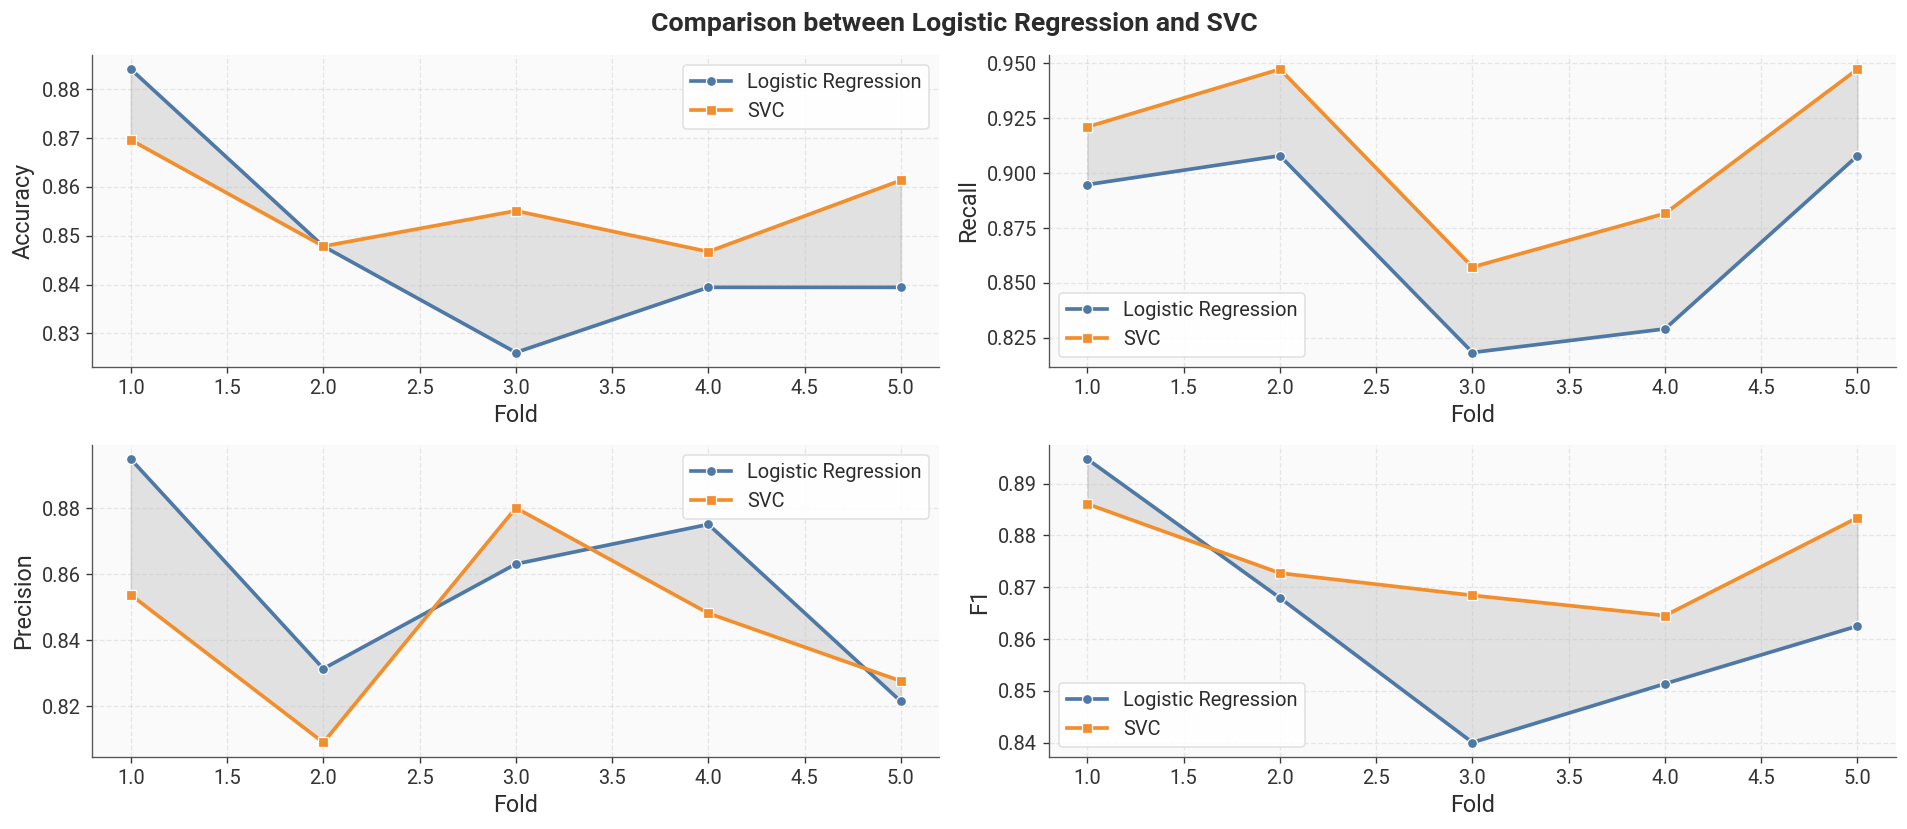

In [29]:
folds = np.arange(1, 6)
metrics = ['Accuracy', 'Recall', 'Precision', 'F1']

# Logistic Regression per-fold scores
scores_lr = {
    'Accuracy': accuracies,
    'Recall': recalls,
    'Precision': precisions,
    'F1': f1s,     
}

# SVC per-fold scores
scores_svc = {
    'Accuracy': accuracies_svc,
    'Recall': recalls_svc,
    'Precision': precisions_svc,
    'F1': f1s_svc
}


figure, axes = plt.subplots(2, 2, figsize=(16, 7))
axes = axes.flatten()


for ax, metric in zip(axes, metrics):
    sns.lineplot(x=folds, y=scores_lr[metric], ax=ax, label='Logistic Regression', marker='o')
    sns.lineplot(x=folds, y=scores_svc[metric], ax=ax, label='SVC', marker='s')
    ax.fill_between(folds, scores_lr[metric], scores_svc[metric], color='grey', alpha=0.2)
    
    ax.set_xlabel('Fold')
    ax.set_ylabel(metric)
    ax.grid(alpha=0.3)

figure.suptitle('Comparison between Logistic Regression and SVC');

In [30]:
# from sklearn.model_selection import learning_curve

# training_size = np.linspace(0.1, 1.0, 10)
# training_sizes, training_scores, validation_scores = learning_curve(estimator=pipe, X=X_train, y=y_train,
#                                                                     cv=skfold, train_sizes=training_size, scoring='accuracy',
#                                                                     shuffle=True, random_state=42)

# mean_training_scores = np.mean(training_scores, axis=1)
# mean_validation_scores = np.mean(validation_scores, axis=1)

# figure, ax = plt.subplots(1, 1, figsize=(8, 5))

# sns.lineplot(x=training_sizes, y=mean_training_scores, label='Training F1 score', marker='o',)
# sns.lineplot(x=training_sizes, y=mean_validation_scores, label='Validation F1 score', marker='s')

# ax.set_title(f"Learning Curve\n{str(pipe['model'])}")
# ax.set_xlabel('Training Set Size')
# ax.set_ylabel('F1 score')
# ax.legend()
# ax.set_yticks(np.arange(0.7, 1 + 0.1, 0.1))  # ticks at 0.0, 0.1, 0.2, ..., 1.0
# ax.grid(alpha=0.4)